In [20]:
import pandas as pd
df=pd.read_csv('/content/crime_data.csv')

In [21]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [23]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [24]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [25]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Unnamed: 0']= label_encoder.fit_transform(df['Unnamed: 0'])
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [26]:
df.dtypes

Unnamed: 0      int64
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

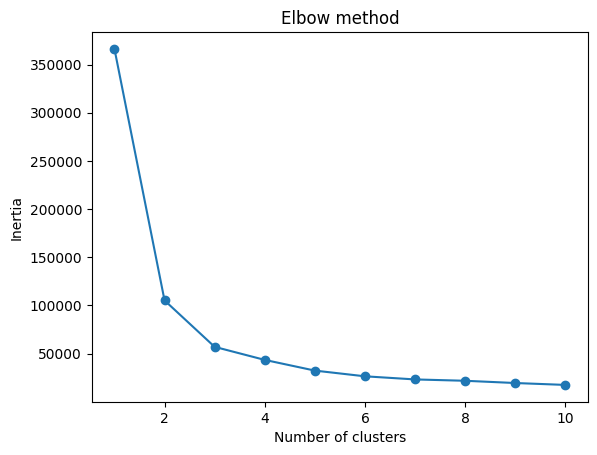

In [28]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    y = kmeans.fit_predict(df)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
df['clusters']= y
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,0,13.2,236,58,21.2,1
1,1,10.0,263,48,44.5,1
2,2,8.1,294,80,31.0,3
3,3,8.8,190,50,19.5,8
4,4,9.0,276,91,40.6,4
5,5,7.9,204,78,38.7,8
6,6,3.3,110,77,11.1,5
7,7,5.9,238,72,15.8,1
8,8,15.4,335,80,31.9,7
9,9,17.4,211,60,25.8,8


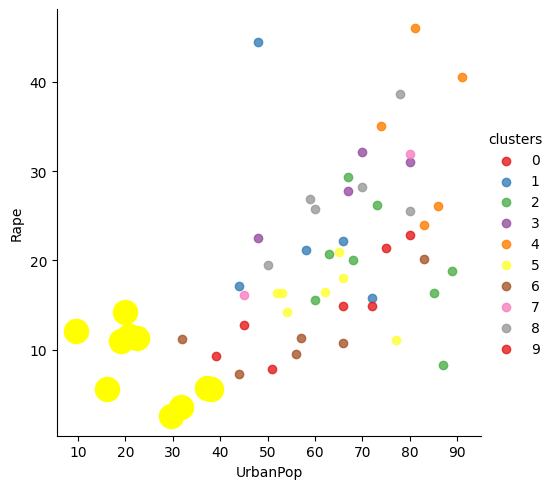

In [30]:
import seaborn as sns
sns.lmplot(data=df, x='UrbanPop',y='Rape',fit_reg=False,hue='clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow')
plt.show()

In [31]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
neigh_dist, neigh_ind = nbrs.kneighbors(df)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)


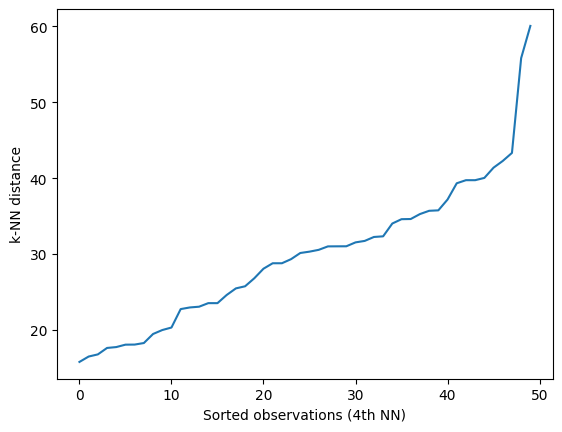

In [32]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [33]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
# get cluster labels
clusters.labels_
# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [34]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 50})

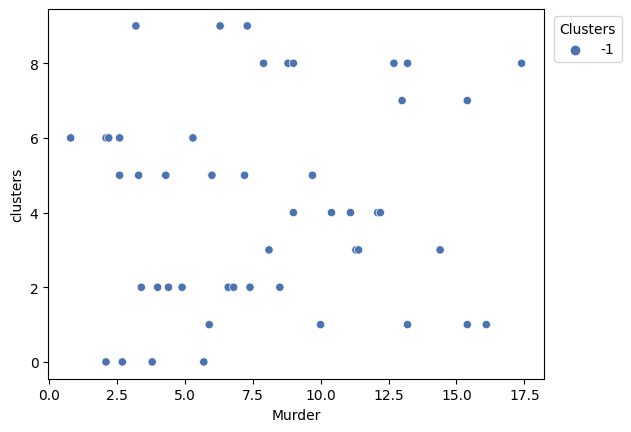

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, x = "Murder", y = "clusters", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(df)
clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0])

In [38]:
# Reduce the dimensionality of data to 3 features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['p1','p2']

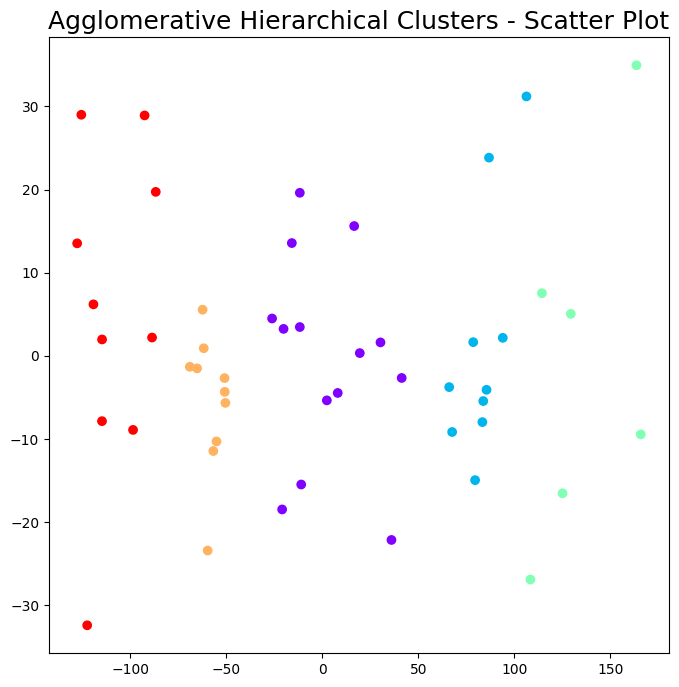

In [39]:
agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['p1'],df_pca['p2'],c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()